In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
import time
import itk
from itkwidgets import view

need to exchange y and x coordinates
spacing need to change to  ([0.677734, 0.677734, 0.5])

In [2]:
# generating image matrix
def index_matrix():
    index_matrix=np.zeros((512,512,768))
    return index_matrix
    

In [3]:
#find out origins

In [4]:
def seed_generation():
    #set starting seed at trechea
    mu = 6 #
    sigma = 2 
    rand_pos = np.random.normal(mu, sigma, 3)
    seed=np.array([int(rand_pos[0]),int(rand_pos[1]),30])
    return seed

In [5]:
index_mat=index_matrix()

In [6]:
seed=seed_generation()

In [7]:
def parameter_generation(cl_mean,cl_sig,r_mean,r_sig,phi_min,phi_max,theta_min,theta_max):
    cl=np.random.normal(cl_mean,cl_sig)
    if cl<0:
        cl=0
    r=np.random.normal(r_mean,r_sig)
    phi=np.random.randint(phi_min,phi_max)/180*np.pi
    theta=np.random.randint(theta_min,theta_max)/180*np.pi
    return np.array([cl,r,phi,theta])

NameError: name 'r45' is not defined

In [10]:
trachea=parameter_generation(109,14,23.9,2.9,-180,180,0,5)## radius needed and centerline length needed
rm=parameter_generation(25.5,2.5,20,2.6,175,195,30,45)
ru=parameter_generation(15,4,14.5,4,180,210,135,150)
br=parameter_generation(29,3,15.65,2.25,175,195,30,45)
r45=parameter_generation(19,4,10.3,2.16,180,225,60,90)
r6=parameter_generation(10,4,9.8,3.3,105,145,60,90)
rl7=parameter_generation(10.5,3.25,12.1,1.85,175,195,20,40)
r7=parameter_generation(16,5,7.74,1.23,-105,-30,30,45)
rl=parameter_generation(10,4,11,1.8,175,195,20,40)
r8=parameter_generation(12.5,1.5,8.5,1.33,195,255,45,60)
r910=parameter_generation(11,3.5,10,2.75,175,195,20,40)
r9=parameter_generation(15,3.5,7.56,1.4,175,195,20,45)
r10=parameter_generation(13,3.5,8.54,1.76,-30,30,0,45)
r1=parameter_generation(13,3.5,8.8,3.14,-90,180,150,180)
r2=parameter_generation(11,3,8.6,2,90,150,75,120)
r3=parameter_generation(12,3.75,9.7,1.8,150,270,80,120)
r4=parameter_generation(12.5,4,7.71,1.33,150,180,60,90)
r5=parameter_generation(14,4,8.25,1.4,195,225,60,90)

lm=parameter_generation(50,5,17,2.4,-15,5,30,45)
lu=parameter_generation(13,3,14.5,3.2,-45,0,135,150)
ll6=parameter_generation(12.5,2.5,15,3,-15,5,30,45)
l6=parameter_generation(10,2.8,10.8,2.8,55,105,50,90)
ll=parameter_generation(17,4,12.1,1.54,-15,5,30,45)
l8=parameter_generation(12.5,4,9.18,1.67,-75,5,45,60)
l910=parameter_generation(10,3,10.86,1.87,-25,5,15,45)
l9=parameter_generation(15,4.75,8.32,1.55,5,25,10,45)
l10=parameter_generation(15,4.75,8.92,1.54,5,25,10,45)
l123=parameter_generation(11.5,3,12,2.82,-90,90,160,180)
l12=parameter_generation(11,3.5,9.2,2.55,120,240,120,180)
l1=parameter_generation(13,3.5,7.54,1.32,90,150,150,180)
l2=parameter_generation(12.5,3,6.74,1.4,150,210,150,180)
l3=parameter_generation(10,3,9.13,1.53,-60,60,120,150)
l45=parameter_generation(14,5,10.56,3.62,-15,30,60,75)
l4=parameter_generation(12.5,5,7.6,1.73,-15,30,60,75)
l5=parameter_generation(12.5,7.5,1.29,5,15,30,45,60)

In [11]:
def main_branch_generation(seed,index_matrix,branch,base=[0,0,0,0],label=100,vanish=1,bifurcate=1):
    length=int(branch[0]*2)
    phi=branch[2]
    theta=branch[3]
    base_r=int(base[1])
    x=np.zeros((length))
    y=np.zeros((length))
    z=np.zeros((length))
    x1=x
    y1=y
    z1=z
    line=np.zeros((length))
    line1=line
    prob_v=np.random.binomial(1,vanish,1)[0]
    prob_b=np.random.binomial(1,bifurcate,1)[0]
    for i in range (0,length):
        x[i]=int((base_r+i)*np.sin(theta)*np.cos(phi))+seed[0]
        y[i]=int((base_r+i)*np.sin(theta)*np.sin(phi))+seed[1]
        z[i]=int((base_r+i)*np.cos(theta))+seed[2]
        line[i]=label
        index_matrix[int(x[i])+256,int(y[i])+256,int(z[i])]=line[i]
        if prob_v==0:
            index_matrix[int(x[i])+256,int(y[i])+256,int(z[i])]=0
    end=len(x)-1
    end=np.array([x[end],y[end],z[end]])
    if prob_v==0:
        end=seed
    if prob_b==0:
        theta1=theta+np.random.randint(15,30)/180*np.pi
        for j in range (0,length):
            x1[j]=int((base_r+j)*np.sin(theta1)*np.cos(phi))+seed[0]
            y1[j]=int((base_r+j)*np.sin(theta1)*np.sin(phi))+seed[1]
            z1[j]=int((base_r+j)*np.cos(theta1))+seed[2]
            line1[j]=label
            index_matrix[int(x1[j])+256,int(y1[j])+256,int(z1[j])]=line1[j]
        x=np.hstack((x,x1))
        y=np.hstack((y,y1))
        z=np.hstack((z,z1))
    return index_matrix,end,x,y,z,theta

In [26]:
#main_branch_generation(seed,index_matrix,branch,label=100,vanish=1,bifurcate=1)
#trachea
index_mat,trachea_end,x_t,y_t,z_t,theta_t=main_branch_generation(seed,index_mat,trachea)
#rmb
index_mat,rm_end,x_rm,y_rm,z_rm,theta_rm=main_branch_generation(trachea_end,index_mat,rm,trachea)
#rul
index_mat,ru_end,x_ru,y_ru,z_ru,theta_ru=main_branch_generation(rm_end,index_mat,ru,rm)
#bronlnt
index_mat,br_end,x_br,y_br,z_br,theta_br=main_branch_generation(rm_end,index_mat,br,rm)
#rb4+5
index_mat,r45_end,x_r45,y_r45,z_r45,theta_r45=main_branch_generation(br_end,index_mat,r45,br)
#rb6
index_mat,r6_end,x_r6,y_r6,z_r6,theta_r6=main_branch_generation(br_end,index_mat,r6,br)
#rll7
index_mat,rl7_end,x_rl7,y_rl7,z_rl7,theta_rl7=main_branch_generation(br_end,index_mat,rl7,br)
#rb7(future needs a vanish factor)
index_mat,r7_end,x_r7,y_r7,z_r7,theta_r7=main_branch_generation(rl7_end,index_mat,r7,rl7)
#rll
index_mat,rl_end,x_rl,y_rl,z_rl,theta_rl=main_branch_generation(rl7_end,index_mat,rl7)
#rb8(needs bifurcation factor)
index_mat,r8_end,x_r8,y_r8,z_r8,theta_r8=main_branch_generation(rl_end,index_mat,r8,rl)
#rb9+10(needs a vanish factor)
index_mat,r910_end,x_r910,y_r910,z_r910,theta_r90=main_branch_generation(rl_end,index_mat,r910,rl)
#rb9
index_mat,r9_end,x_r9,y_r9,z_r9,theta_r9=main_branch_generation(r910_end,index_mat,r9,r910)
#rb10
index_mat,r10_end,x_r10,y_r10,z_r10,theta_r10=main_branch_generation(r910_end,index_mat,r10,r910)
#rb1
index_mat,r1_end,x_r1,y_r1,z_r1,theta_r1=main_branch_generation(ru_end,index_mat,r1,ru)
#rb2
index_mat,r2_end,x_r2,y_r2,z_r2,theta_r2=main_branch_generation(ru_end,index_mat,r2,ru)
#rb3
index_mat,r3_end,x_r3,y_r3,z_r3,theta_r3=main_branch_generation(ru_end,index_mat,r3,ru)
#rb4
index_mat,r4_end,x_r4,y_r4,z_r4,theta_r4=main_branch_generation(r45_end,index_mat,r4,r45)
#rb5
index_mat,r5_end,x_r5,y_r5,z_r5,theta_r5=main_branch_generation(r45_end,index_mat,r5,r45)

In [27]:
x_rm[0]

0.0

In [28]:
#lmb
index_mat,lm_end,x_lm,y_lm,z_lm,theta_lm=main_branch_generation(trachea_end,index_mat,lm,trachea)
#lul
index_mat,lu_end,x_lu,y_lu,z_lu,theta_lu=main_branch_generation(lm_end,index_mat,lu,lm)
#llb6
index_mat,ll6_end,x_ll6,y_ll6,z_ll6,theta_ll6=main_branch_generation(lm_end,index_mat,ll6,lm)
#lb6
index_mat,l6_end,x_l6,y_l6,z_l6,theta_l6=main_branch_generation(ll6_end,index_mat,l6,ll6)
#llb
index_mat,ll_end,x_ll,y_ll,z_ll,theta_ll=main_branch_generation(ll6_end,index_mat,ll,ll6)
#lb8
index_mat,l8_end,x_l8,y_l8,z_l8,theta_l8=main_branch_generation(ll_end,index_mat,l8,ll)
#lb9+10
index_mat,l910_end,x_l910,y_l910,z_l910,theta_l910=main_branch_generation(ll_end,index_mat,l910,ll)
#lb9
index_mat,l9_end,x_l9,y_l9,z_l9,theta_l9=main_branch_generation(l910_end,index_mat,l9,l910)
#lb10
index_mat,l10_end,x_l10,y_l10,z_l10,theta_l10=main_branch_generation(l910_end,index_mat,l10,l910)
#lb1+2+3
index_mat,l123_end,x_l123,y_l123,z_l123,theta_l123=main_branch_generation(lu_end,index_mat,l123,lu)
#lb1+2
index_mat,l12_end,x_l12,y_l12,z_l12,theta_l12=main_branch_generation(l123_end,index_mat,l12,l123)
#lb3
index_mat,l3_end,x_l3,y_l3,z_l3,theta_l3=main_branch_generation(l123_end,index_mat,l3,l123)
#lb1
index_mat,l1_end,x_l1,y_l1,z_l1,theta_l1=main_branch_generation(l12_end,index_mat,l1,l12)
#lb2
index_mat,l2_end,x_l2,y_l2,z_l2,theta_l2=main_branch_generation(l12_end,index_mat,l2,l12)
#lb4+5
index_mat,l45_end,x_l45,y_l45,z_l45,theta_l45=main_branch_generation(lu_end,index_mat,l45,lu)
#lb4
index_mat,l4_end,x_l4,y_l4,z_l4,theta_l4=main_branch_generation(l45_end,index_mat,l4,l45)
#lb5
index_mat,l5_end,x_l5,y_l5,z_l5,theta_l5=main_branch_generation(l45_end,index_mat,l5,l45)

In [29]:
from mpl_toolkits.mplot3d import Axes3D

[-140, 140, -140, 140]

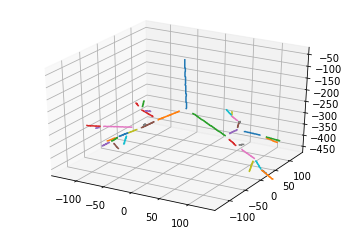

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x_t,y_t,-z_t)
ax.plot(x_rm,y_rm,-z_rm)
ax.plot(x_lm,y_lm,-z_lm)
ax.plot(x_ru,y_ru,-z_ru)
ax.plot(x_lu,y_lu,-z_lu)
ax.plot(x_br,y_br,-z_br)
ax.plot(x_r45,y_r45,-z_r45)
ax.plot(x_r6,y_r6,-z_r6)
ax.plot(x_rl7,y_rl7,-z_rl7)
ax.plot(x_r7,y_r7,-z_r7)
ax.plot(x_rl,y_rl,-z_rl)
ax.plot(x_r8,y_r8,-z_r8)
ax.plot(x_r910,y_r910,-z_r910)
ax.plot(x_ll6,y_ll6,-z_ll6)
ax.plot(x_r9,y_r9,-z_r9)
ax.plot(x_r10,y_r10,-z_r10)
ax.plot(x_ll,y_ll,-z_ll)
ax.plot(x_l6,y_l6,-z_l6)
ax.plot(x_l8,y_l8,-z_l8)
ax.plot(x_l910,y_l910,-z_l910)
ax.plot(x_l9,y_l9,-z_l9)
ax.plot(x_l10,y_l10,-z_l10)
ax.plot(x_r1,y_r1,-z_r1)
ax.plot(x_r2,y_r2,-z_r2)
ax.plot(x_r3,y_r3,-z_r3)
ax.plot(x_l123,y_l123,-z_l123)
ax.plot(x_l12,y_l12,-z_l12)
ax.plot(x_l3,y_l3,-z_l3)
ax.plot(x_l1,y_l1,-z_l1)
ax.plot(x_l2,y_l2,-z_l2)
ax.plot(x_l45,y_l45,-z_l45)
ax.plot(x_l4,y_l4,-z_l4)
ax.plot(x_l5,y_l5,-z_l5)
ax.plot(x_r4,y_r4,-z_r4)
ax.plot(x_r5,y_r5,-z_r5)
ax.axis([-140,140,-140,140])

##### z_t

In [16]:
plt.close('all')

In [31]:
## airway_modeling
def airway_modeling(index_matrix,x,y,z,end,branch,num_id):
    start=time.time()
    P=[x[0]+256,y[0]+256,z[0]]
    Q=end+[256,256,0]
    AB = Q - P;
    temp = AB / np.dot(AB,AB);
    r=branch[1]
    xx=[]
    yy=[]
    zz=[]
    l=index_matrix.shape[0]   #save memory
    w=index_matrix.shape[1]
    h=index_matrix.shape[2]
    lmin=int(min(x)+256-1.2*int(r))
    lmax=int(max(x)+256+1.2*int(r))
    wmin=int(min(y)+256-1.2*int(r))
    wmax=int(max(y)+256+1.2*int(r))
    hmin=int(min(z)-1*int(r))
    if hmin<0:
        hmin=0
    hmax=int(max(z)+1*int(r)+1)
    m=len(x)
    x_range = np.sort(np.array([P[0], Q[0]]));
    y_range = np.sort(np.array([P[1], Q[1]]));
    z_range = np.sort(np.array([P[2], Q[2]]));
    #for any point on line x^2+y^2+z^2=<r^2
    for i in range(lmin,lmax):       
        for j in range (wmin,wmax):
            for k in range(hmin,hmax):
                p = np.array([i, j, k])
                AP = p - P;
                BP = p - Q
                proj_point = P + np.dot(AP,AB) * temp;
                distance_s = (proj_point[0] - p[0])**2 + (proj_point[1] - p[1])**2 + (proj_point[2] - p[2])**2;
                distance_1_s = (P[0] - p[0])**2 + (P[1] - p[1])**2 + (P[2] - p[2])**2;
                distance_2_s = (Q[0] - p[0])**2 + (Q[1] - p[1])**2 + (Q[2] - p[2])**2;
#                 distance_t1= AP[0]**2+AP[1]**2+AP[2]**2
#                 distance_t2= BP[0]**2+BP[1]**2+BP[2]**2

#                 if distance_s <=r*r or distance_t1<=r*r or distance_t2<=r*r and index_matrix[i,k,k]==0:
                if distance_s <=r*r and index_matrix[i,j,k]==0 and (x_range[0] <= proj_point[0] and proj_point[0] <= x_range[1]) and (
                            y_range[0] <= proj_point[1] and proj_point[1] <= y_range[1]) and (
                                    z_range[0] <= proj_point[2] and proj_point[2] <= z_range[1]) or distance_1_s<=r*r or distance_2_s<=r*r:
                    if index_mat[i,j,k]==0:
                
                        index_mat[i,j,k]=num_id
#                     if not((x_range[0] <= proj_point[0] and proj_point[0] <= x_range[1]) and (y_range[0] <= proj_point[1] and proj_point[1] <= y_range[1]) and (z_range[0] <= proj_point[2] and proj_point[2] <= z_range[1])):
                    
#                     continue
                    
#                     if distance_2_s < r * r:
#                         index_mat[i, j, k] = 200;
#                         continue
#                 else:
#                         # projected_point with in the line segment
#                     index_mat[i, j, k] = 50
#                     continue
#                         xx.append(i-256)
#                         yy.append(j-256)
#                         zz.append(k)
                
    end=time.time()
    print (end-start,"s")
    return index_matrix#,xx,yy,zz

                    

#check airway matrix
index_mat,xx_t,yy_t,zz_t=airway_modeling(index_mat,x_t,y_t,z_t,21.2,2.6,1)#trachea

                

In [32]:
index_mat=airway_modeling(index_mat,x_t,y_t,z_t,trachea_end,trachea,20)
index_mat=airway_modeling(index_mat,x_rm,y_rm,z_rm,rm_end,rm,40)
index_mat=airway_modeling(index_mat,x_ru,y_ru,z_ru,ru_end,ru,60)
index_mat=airway_modeling(index_mat,x_br,y_br,z_br,br_end,br,80)
index_mat=airway_modeling(index_mat,x_r45,y_r45,z_r45,r45_end,r45,100)
index_mat=airway_modeling(index_mat,x_r6,y_r6,z_r6,r6_end,r6,120)
index_mat=airway_modeling(index_mat,x_rl7,y_rl7,z_rl7,rl7_end,rl7,140)
index_mat=airway_modeling(index_mat,x_rl,y_rl,z_rl,rl_end,rl,160)
index_mat=airway_modeling(index_mat,x_r910,y_r910,z_r910,r910_end,r910,180)
index_mat=airway_modeling(index_mat,x_r8,y_r8,z_r8,r8_end,r8,200)
index_mat=airway_modeling(index_mat,x_r9,y_r9,z_r9,r9_end,r9,220)
index_mat=airway_modeling(index_mat,x_r10,y_r10,z_r10,r10_end,r10,240)
index_mat=airway_modeling(index_mat,x_r4,y_r4,z_r4,r4_end,r4,260)
index_mat=airway_modeling(index_mat,x_r5,y_r5,z_r5,r5_end,r5,280)
index_mat=airway_modeling(index_mat,x_r7,y_r7,z_r7,r7_end,r7,300)
index_mat=airway_modeling(index_mat,x_r1,y_r1,z_r1,r1_end,r8,320)
index_mat=airway_modeling(index_mat,x_r2,y_r2,z_r2,r2_end,r2,340)
index_mat=airway_modeling(index_mat,x_r3,y_r3,z_r3,r3_end,r3,360)

14.426326751708984 s
5.578233480453491 s
3.5437018871307373 s
4.9646899700164795 s
1.2162764072418213 s
0.6651170253753662 s
1.0746097564697266 s
1.4129598140716553 s
0.4394536018371582 s
0.5676159858703613 s
0.34247779846191406 s
0.4008486270904541 s
0.5500729084014893 s
0.1446700096130371 s
0.6048696041107178 s
1.3481636047363281 s
0.33339834213256836 s
0.4961540699005127 s


In [33]:
mat=np.array(index_mat,dtype="f")

In [34]:
image=itk.GetImageFromArray(mat)

In [35]:
image.SetSpacing([0.5,0.5,0.5])

In [37]:
view(image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkIma…

In [19]:
ImageType = itk.Image[itk.F, 3]
WriterType = itk.ImageFileWriter[ImageType]
writer = WriterType.New()
writer.SetFileName('outputImage.nii.gz')
writer.SetInput(image)

writer.Update()

In [20]:
inputImage=itk.imread('outputImage.nii.gz',itk.F)

In [21]:
view(inputImage)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkIma…

In [39]:
r3

array([12.81530932,  9.78223657,  1.6406095 ,  0.78539816])

In [41]:
r2

array([5.95179267, 9.67582555, 2.49582083, 2.02458193])